In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import plotnine as p9

*0. Import the data and declare your package dependencies.*

In [50]:
# Importing the avocado data from https://www.kaggle.com/datasets/timmate/avocado-prices-2020
avocado2020 = pd.read_csv("/content/drive/MyDrive/avocado-updated-2020.csv")
avocado2020

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


*1. Briefly describe the data set. What information does it contain?*

The dataset contains information about the sales of avocados, with each row being a specific date, containing variables such as avg price, total volume, breakdown of #sku numbers, the total amount of bags and a breakdown of diff sizes of bags, the type of avocado (conventional or organic), the year, and geography. A total of 33045 rows and 13 columns.


*2. Clean the data in any way you see fit.*

Small/Medium Hass Avocado (~3-5oz avocado) | #4046 Avocado

Large Hass Avocado (~8-10oz avocado) | #4225 Avocado

Extra Large Hass Avocado (~10-15oz avocado) | #4770 Avocado

from https://loveonetoday.com/how-to/identify-hass-avocados/

In [3]:
# Checking if there are any missing or NA values in the dataframe
avocado2020.isna().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [4]:
# Checking what values for 'geography'
avocado2020['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

Pre-Filtering of data

Major Geographical Regions:
California, Great Lakes, Midsouth, Northeast, Plains, South Central, Southeast, West.

Major Metropolitan Regions:
Baltimore/Washington, Buffalo/Rochester, Cincinnati/Dayton, Dallas/Ft. Worth, Harrisburg/Scranton, Hartford/Springfield, Miami/Ft. Lauderdale, New Orleans/Mobile, Northern New England, Raleigh/Greensboro, Richmond/Norfolk, South Dakota, West Tex/New Mexico

California and South Dakota were the only 'states' in the values, and 'New York' was designated as New York City, and not state. California's geographical area is as large or even larger than these other major geographical regions in the above list so it's been included as a Major Region. South Dakota's area was similar to that of metroplitan regions, so it has been designated a Metro Region. Total U.S. has been designated as 'Country' in the variable 'RegionType'.

In [51]:
# Melting the avocado sizes into a column 'size'
avocado_melted = avocado2020.melt(id_vars=[col for col in avocado2020.columns if col not in ['4046', '4225', '4770']],
                                  value_vars=['4046', '4225', '4770'],
                                  var_name='SKU',
                                  value_name='count')

# Mapping the size codes to small, large, xlarge
size_mapping = {'4046': 'small', '4225': 'large', '4770': 'xlarge'}
avocado_melted['size'] = avocado_melted['SKU'].map(size_mapping)

In [52]:
avocado_melted

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,SKU,count,size
0,2015-01-04,1.22,40873.28,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,4046,2819.50,small
1,2015-01-04,1.79,1373.95,1162.65,1162.65,0.00,0.00,organic,2015,Albany,4046,57.42,small
2,2015-01-04,1.00,435021.49,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,4046,364302.39,small
3,2015-01-04,1.76,3846.69,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,4046,1500.15,small
4,2015-01-04,1.08,788025.06,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,4046,53987.31,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99130,2020-11-29,1.47,1583056.27,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,4770,2617.17,xlarge
99131,2020-11-29,0.91,5811114.22,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,4770,19741.90,xlarge
99132,2020-11-29,1.48,289961.27,256709.92,122606.21,134103.71,0.00,organic,2020,West,4770,636.51,xlarge
99133,2020-11-29,0.67,822818.75,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,4770,10543.63,xlarge


In [7]:
# Checking for duplicate rows
avocado_melted[avocado_melted.duplicated()]

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,SKU,count,size


In [53]:
# Defining the major and metro regions
major_regions = ['California', 'Great Lakes', 'Midsouth', 'Northeast', 'Plains', 'South Central', 'Southeast', 'West']
metro_regions = ['Baltimore/Washington', 'Buffalo/Rochester', 'Cincinnati/Dayton', 'Dallas/Ft. Worth', 'Harrisburg/Scranton', 'Hartford/Springfield', 'Miami/Ft. Lauderdale', 'New Orleans/Mobile', 'Northern New England', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'South Dakota', 'West Tex/New Mexico']

# Defining the category conditions
conditions = [
    avocado_melted['geography'].isin(major_regions),
    avocado_melted['geography'].isin(metro_regions),
    avocado_melted['geography'] == 'Total U.S.',
    (avocado_melted['geography'] != 'Total U.S.') & (~avocado_melted['geography'].isin(major_regions)) & (~avocado_melted['geography'].isin(metro_regions))
]

# Defining the category names matching the conditions
categories = [
    'Major Region',
    'Metro Region',
    'Country',
    'City'
]

# Assigning categories based on conditions
avocado_melted['RegionType'] = np.select(conditions, categories, default=None)

avocado_melted

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,SKU,count,size,RegionType
0,2015-01-04,1.22,40873.28,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,4046,2819.50,small,City
1,2015-01-04,1.79,1373.95,1162.65,1162.65,0.00,0.00,organic,2015,Albany,4046,57.42,small,City
2,2015-01-04,1.00,435021.49,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,4046,364302.39,small,City
3,2015-01-04,1.76,3846.69,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,4046,1500.15,small,City
4,2015-01-04,1.08,788025.06,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,4046,53987.31,small,Metro Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99130,2020-11-29,1.47,1583056.27,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,4770,2617.17,xlarge,Country
99131,2020-11-29,0.91,5811114.22,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,4770,19741.90,xlarge,Major Region
99132,2020-11-29,1.48,289961.27,256709.92,122606.21,134103.71,0.00,organic,2020,West,4770,636.51,xlarge,Major Region
99133,2020-11-29,0.67,822818.75,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,4770,10543.63,xlarge,Metro Region


In [13]:
# Saving a local copy of the dataset to further inspect
avocado_melted.to_csv('/content/drive/My Drive/avocado_melted.csv', index=False)

# ***EXERCISES***

3. Which major geographical region sold the most total organic, small Hass avocados in 2017?



In [54]:
# Defining the major geographical regions
major_regions = [
    "California", "Great Lakes", "Midsouth",
    "Northeast", "Plains", "South Central",
    "Southeast", "West"
]

# Filtering the data
organic_small_2017 = avocado_melted[
    (avocado_melted["type"] == "organic") &
    (avocado_melted["year"] == 2017) &
    (avocado_melted["geography"].isin(major_regions)) &
    (avocado_melted["size"] == "small")
]

# Grouping by geography and summing up the total volume of small Hass avocados sold
total_volume_by_region = organic_small_2017.groupby("geography")["total_volume"].sum()

# Identifying the region with the highest total volume sold
max_region = total_volume_by_region.idxmax()
max_volume = total_volume_by_region.max()

(max_region, max_volume)

('West', 12241845.79)

4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [55]:
# Converting 'date' to datetime type and extracting month, day, and year
avocado_melted["date"] = pd.to_datetime(avocado_melted["date"])
avocado_melted["month"] = avocado_melted["date"].dt.month_name()
avocado_melted["day"] = avocado_melted["date"].dt.day
avocado_melted["year"] = avocado_melted["date"].dt.year

# Finding the month with the highest average volume of avocado sales
avg_month_sales = avocado_melted.groupby("month")["total_volume"].mean()
max_month = avg_month_sales.idxmax()
max_avg_vol = avg_month_sales.max()

(max_month, max_avg_vol)

('May', 1123632.2542181069)

5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.



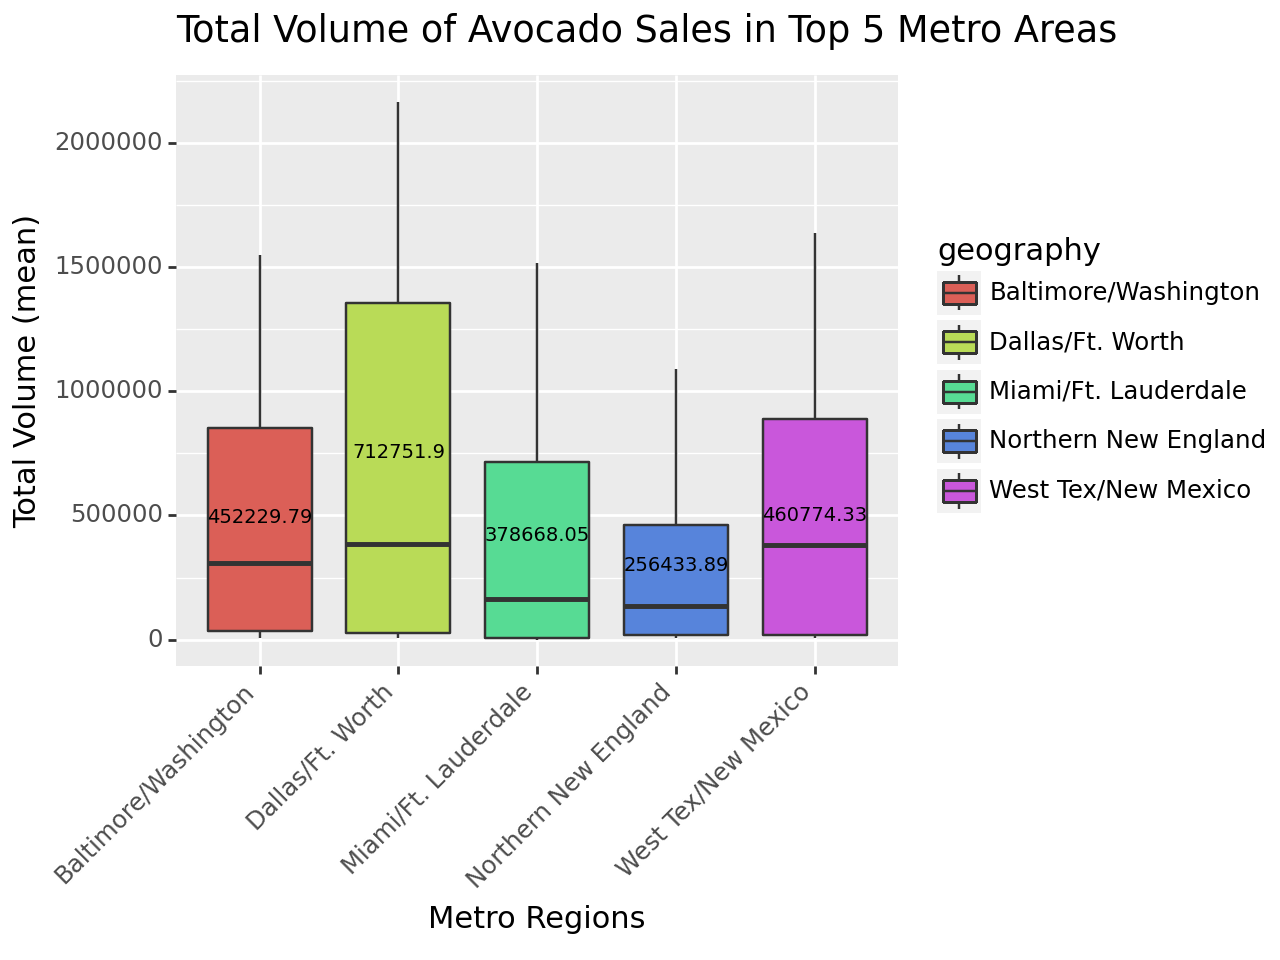

In [56]:
from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_text, geom_text

# Filtering the data for metro regions
metro_areas = avocado_melted[avocado_melted["RegionType"] == "Metro Region"]

# Grouping by geography and finding the average total volume
avg_metro_sales = metro_areas.groupby("geography")["total_volume"].mean()

# Defining the top 5 metro areas
top_metro_areas = avg_metro_sales.nlargest(5)

# Defining 'means' for annotation
means = metro_areas[metro_areas["geography"].isin(top_metro_areas.index)].groupby("geography")["total_volume"].mean().reset_index()
means.rename(columns={"total_volume": "mean_volume"}, inplace=True)

# Plotting
plot = (
    ggplot(metro_areas[metro_areas["geography"].isin(top_metro_areas.index)],
           aes(x='geography', y='total_volume', fill='geography'))
    + geom_boxplot()
    + labs(title="Total Volume of Avocado Sales in Top 5 Metro Areas",
           x="Metro Regions",
           y="Total Volume (mean)")
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
    + geom_text(data=means, mapping=aes(x='geography', y='mean_volume', label='round(mean_volume, 2)'),
                nudge_y=2000,
                size=7,
                va='bottom')
)

plot.draw()

# ***PIVOTING***
The following four California geographical regions are in this data set: "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.



In [13]:
avocado_melted

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,SKU,count,size,RegionType,month,day
0,2015-01-04,1.22,40873.28,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,4046,2819.50,small,City,January,4
1,2015-01-04,1.79,1373.95,1162.65,1162.65,0.00,0.00,organic,2015,Albany,4046,57.42,small,City,January,4
2,2015-01-04,1.00,435021.49,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,4046,364302.39,small,City,January,4
3,2015-01-04,1.76,3846.69,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,4046,1500.15,small,City,January,4
4,2015-01-04,1.08,788025.06,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,4046,53987.31,small,Metro Region,January,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99130,2020-11-29,1.47,1583056.27,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,4770,2617.17,xlarge,Country,November,29
99131,2020-11-29,0.91,5811114.22,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,4770,19741.90,xlarge,Major Region,November,29
99132,2020-11-29,1.48,289961.27,256709.92,122606.21,134103.71,0.00,organic,2020,West,4770,636.51,xlarge,Major Region,November,29
99133,2020-11-29,0.67,822818.75,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,4770,10543.63,xlarge,Metro Region,November,29


In [57]:
# Including only LA, SD, SAC, SF
regions_to_include = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]

# Filtering the rows
avocado_4regions = avocado_melted[avocado_melted['geography'].isin(regions_to_include)]
avocado_4regions

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,SKU,count,size,RegionType,month,day
44,2015-01-04,0.85,2682159.95,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,4046,1837999.65,small,City,January,4
45,2015-01-04,1.25,54495.54,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,4046,47721.51,small,City,January,4
80,2015-01-04,1.05,430138.88,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,4046,110693.69,small,City,January,4
81,2015-01-04,1.33,9213.49,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,4046,3727.52,small,City,January,4
82,2015-01-04,0.94,461607.33,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,4046,244152.26,small,City,January,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99108,2020-11-29,1.43,23531.38,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,4770,0.00,xlarge,City,November,29
99109,2020-11-29,1.12,469356.72,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,4770,7210.47,xlarge,City,November,29
99110,2020-11-29,1.95,25799.95,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,4770,0.00,xlarge,City,November,29
99111,2020-11-29,1.50,644141.37,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,4770,5597.21,xlarge,City,November,29


In [9]:
# Saving a local copy of the dataset to further inspect
avocado_4regions.to_csv('/content/drive/My Drive/avocado_4regions.csv', index=False)

In [58]:
# Grouping by 'geography', 'type', and 'size' and calculating the count for each group
total_volume_by_group = avocado_4regions.groupby(['geography', 'type', 'size'])['count'].sum().reset_index()

print(total_volume_by_group)

        geography          type    size         count
0     Los Angeles  conventional   large  1.358157e+08
1     Los Angeles  conventional   small  3.589234e+08
2     Los Angeles  conventional  xlarge  2.970453e+07
3     Los Angeles       organic   large  6.366092e+06
4     Los Angeles       organic   small  4.419272e+06
5     Los Angeles       organic  xlarge  1.846800e+03
6      Sacramento  conventional   large  7.435955e+07
7      Sacramento  conventional   small  4.323263e+07
8      Sacramento  conventional  xlarge  1.937984e+06
9      Sacramento       organic   large  1.310504e+06
10     Sacramento       organic   small  8.595212e+05
11     Sacramento       organic  xlarge  2.364400e+02
12      San Diego  conventional   large  4.287247e+07
13      San Diego  conventional   small  5.012059e+07
14      San Diego  conventional  xlarge  5.496844e+06
15      San Diego       organic   large  2.225778e+06
16      San Diego       organic   small  7.873589e+05
17      San Diego       orga

7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.



San Francisco has the biggest difference in average price between conventional and organic avocados at 0.72 while San Diego is not far off at 0.68. Los Angeles and Sacramento have lower differences in average price at 0.53 and 0.58 respectively. If we look at individual prices, San Francisco had the highest mean for organic at 2.12 and also the highest max at 3.25, while also having the highest st deviation at 0.40. This, along with the bar graph showing average price differences when subtracting conventional from organic, supports my conclusion that San Francisco has the largest difference in price in avocado types.

       geography          type  count      mean       std   min   25%    50%   75%   max
0    Los Angeles  conventional  918.0  1.047124  0.230915  0.53  0.89  1.020  1.15  1.80
1    Los Angeles       organic  918.0  1.574902  0.311382  0.96  1.34  1.585  1.75  2.44
2     Sacramento  conventional  918.0  1.295359  0.218938  0.86  1.13  1.260  1.43  1.89
3     Sacramento       organic  918.0  1.873856  0.292556  1.13  1.67  1.840  2.05  2.82
4      San Diego  conventional  918.0  1.113856  0.242695  0.61  0.94  1.090  1.22  1.83
5      San Diego       organic  918.0  1.798366  0.331294  1.05  1.55  1.800  2.00  2.78
6  San Francisco  conventional  918.0  1.400490  0.271763  0.84  1.22  1.390  1.57  2.20
7  San Francisco       organic  918.0  2.119444  0.395422  1.06  1.90  2.060  2.36  3.25

type      geography  price_diff
0       Los Angeles    0.527778
1        Sacramento    0.578497
2         San Diego    0.684510
3     San Francisco    0.718954


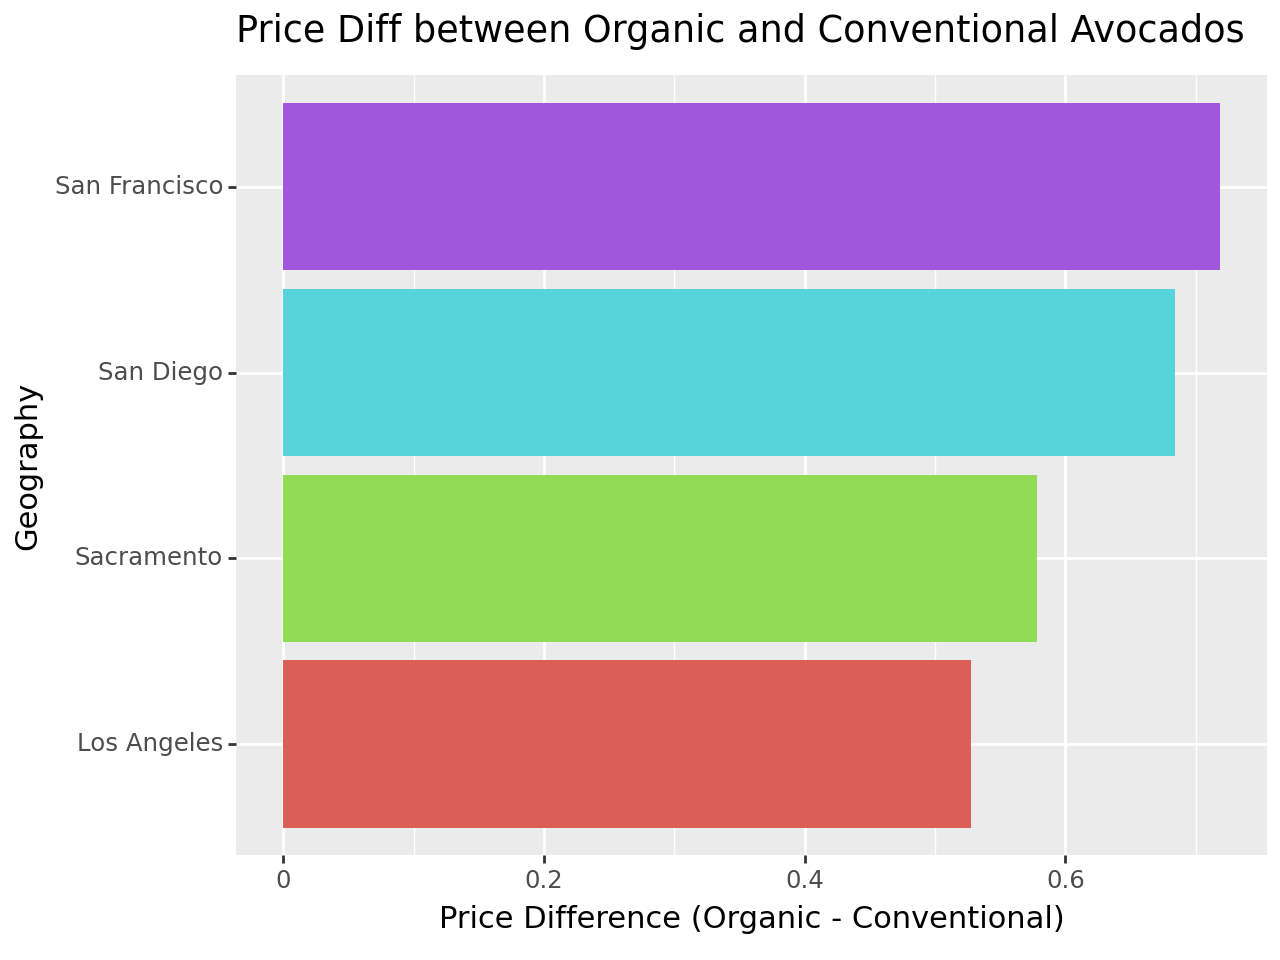

<Figure Size: (640 x 480)>

In [59]:
from plotnine import ggplot, aes, geom_bar, coord_flip, labs

# Grouping by geography and type, then calculating the mean price
mean_price = avocado_4regions.groupby(['geography', 'type'])['average_price'].mean().reset_index()

# Pivoting the data to have types as columns
price_pivot = mean_price.pivot(index='geography', columns='type', values='average_price').reset_index()

# Calculating the price difference between organic and conventional
price_pivot['price_diff'] = price_pivot['organic'] - price_pivot['conventional']

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

# Grouping by geography and type, then calculating descriptive statistics for average_price
desc_stats = avocado_4regions.groupby(['geography', 'type'])['average_price'].describe().reset_index()
print(desc_stats)

# Space between statistics
print()

# Displaying the price difference for each region
print(price_pivot[['geography', 'price_diff']])

# Plotting
plot = (
    ggplot(price_pivot, aes(x='geography', y='price_diff', fill='geography'))
    + geom_bar(stat='identity', show_legend=False)
    + coord_flip()
    + labs(title="Price Diff between Organic and Conventional Avocados",
         x="Geography",
         y="Price Difference (Organic - Conventional)")
)

plot

8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [156]:
# Imported from https://rstudio.csm.calpoly.edu/content/121472ab-4d79-4041-a0b4-9166100fb441/Lab2.html
from IPython.display import Image, display
display(Image(url='https://drive.google.com/uc?export=view&id=1mSlaLgc1sanLw01ewsoTn_4a1bPWYCpD'))

*Tip
This will require transforming of your data! Sketch out what you want the data set to look like before you begin to code! I recommend starting with your California data set you create in Q6.*

First calculate the average sales of each of the 4 geographies by 'count'. Then calculate the total sales per region and type in order to find proportions. Then within each type, find the 'count' sold for each 'size', S L XL, for each of the 4 california regions, LA, SAC, SD, SF. Then create proportions by dividing each city's average sales [S, L, XL] by the total sales [S+L+XL]; separated by 'type' conventional and organic.

sources: hex codes from https://www.color-meanings.com/

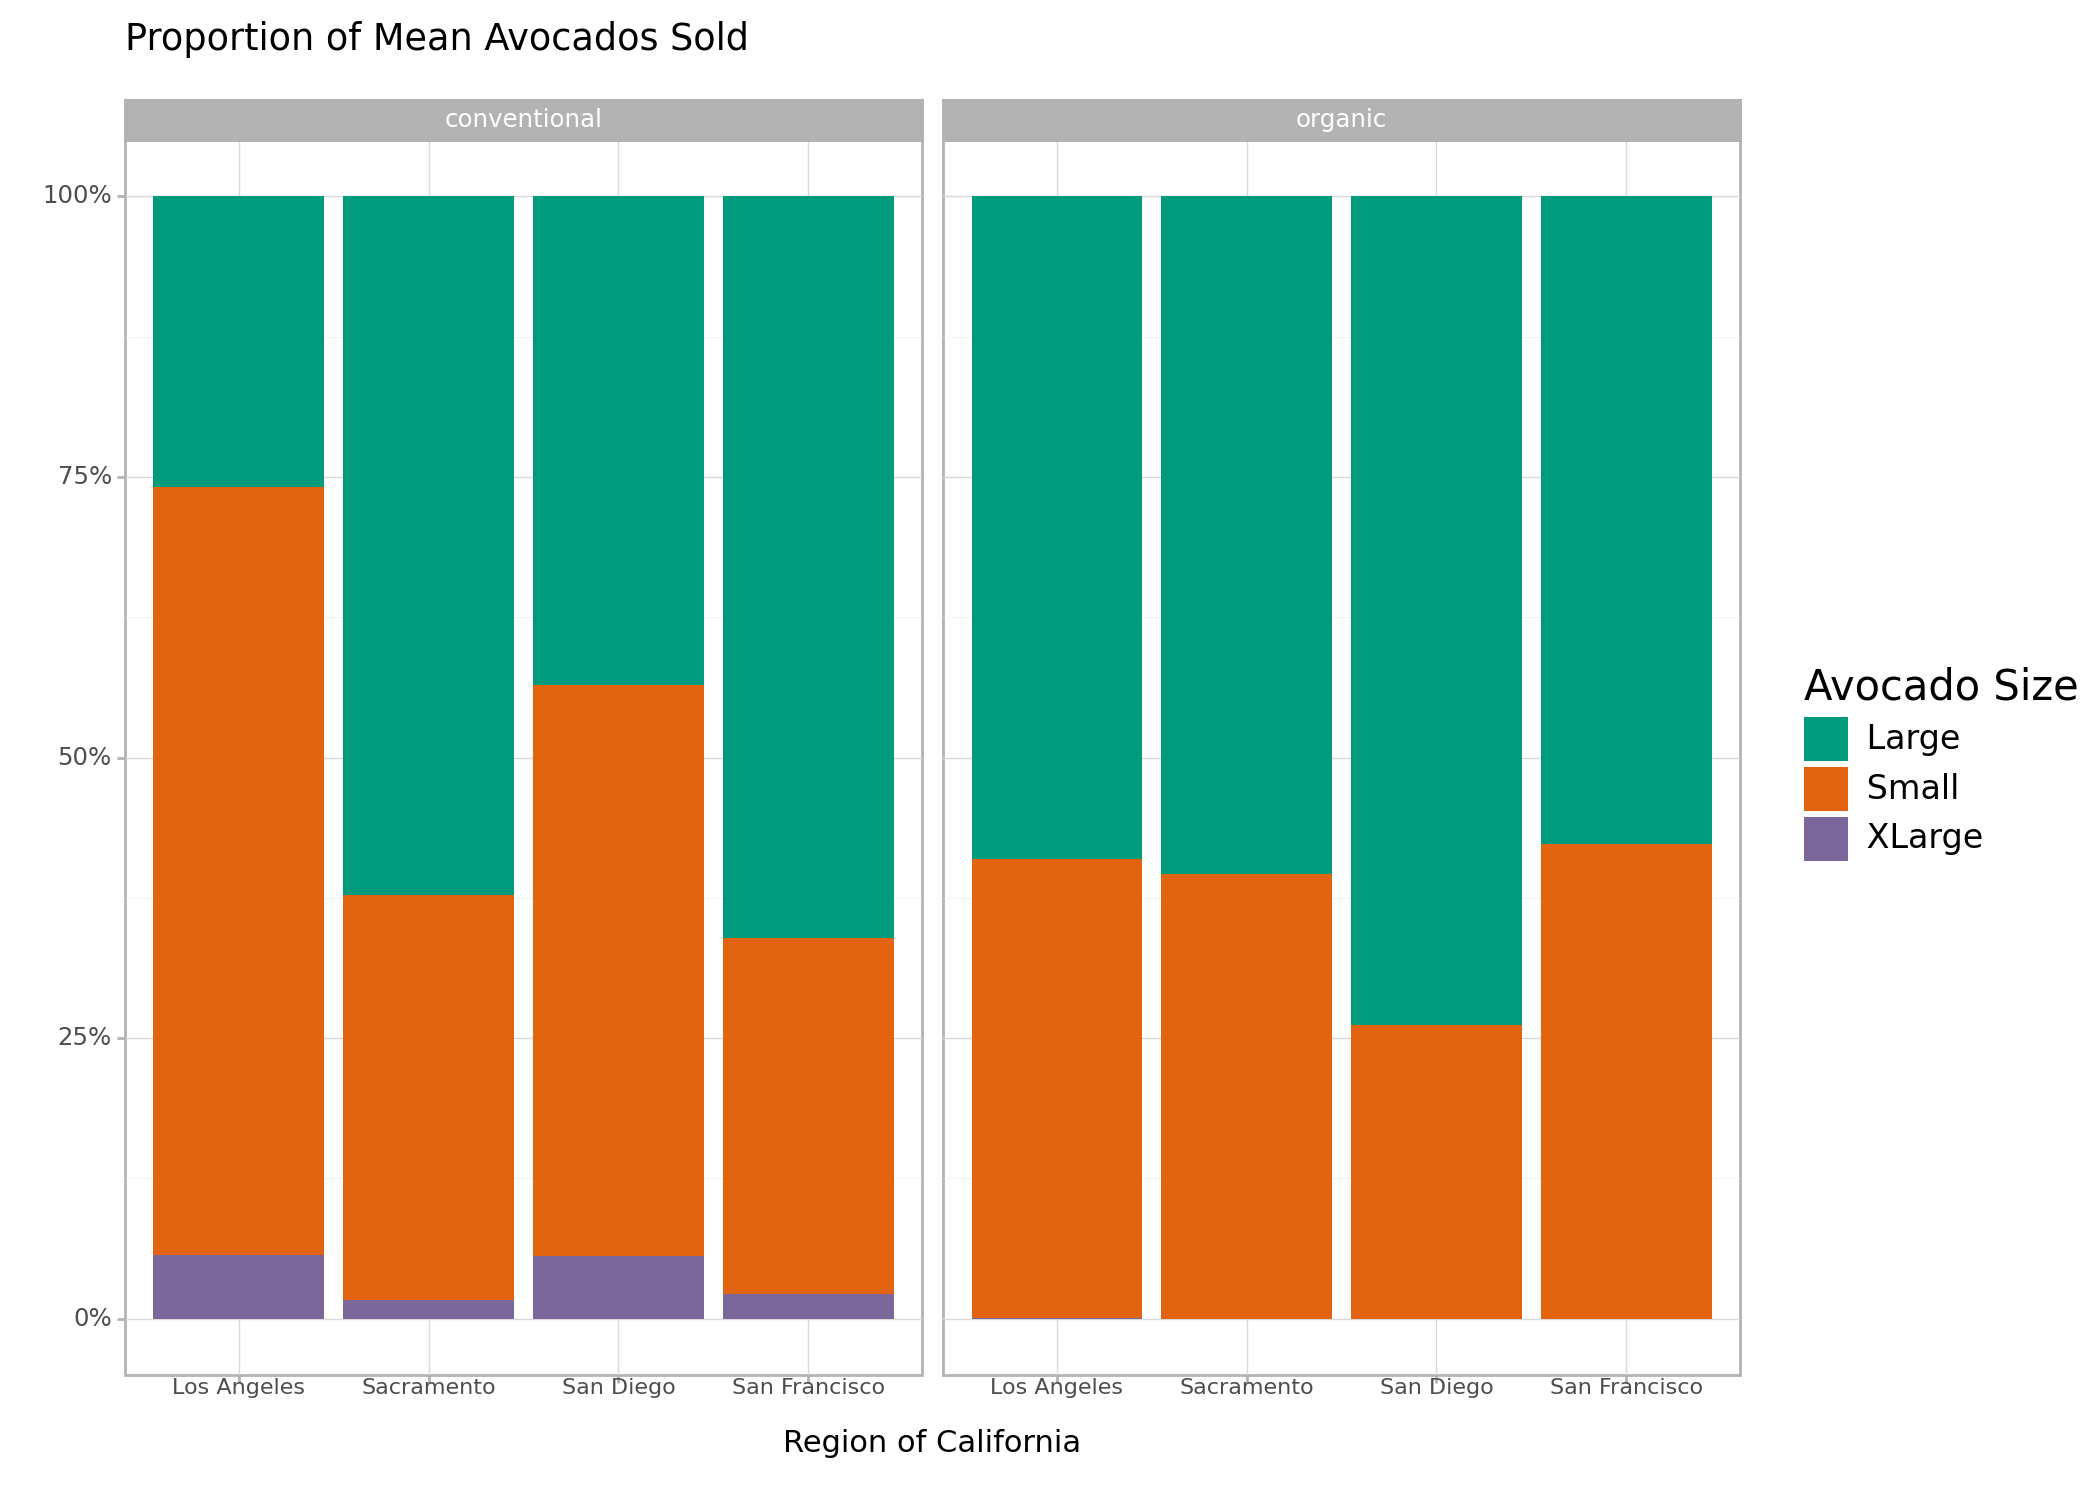

<Figure Size: (1050 x 750)>

In [163]:
from plotnine import ggplot, aes, geom_col, facet_wrap, labs, theme_light, scale_y_continuous, scale_fill_manual, theme, element_text

# Calculating the average sales
avg_sales = avocado_4regions.groupby(['geography', 'type', 'size'])['count'].mean().reset_index()

# Calculating the total sales per region and type to find proportions
total_sales = avg_sales.groupby(['geography', 'type'])['count'].sum().reset_index()
total_sales.rename(columns={'count': 'total_sales'}, inplace=True)

# Merging the total sales back to the average sales
avg_sales = pd.merge(avg_sales, total_sales, on=['geography', 'type'])

# Calculating the proportions
avg_sales['proportion'] = avg_sales['count'] / avg_sales['total_sales'] * 100

# Plotting
plot = (
    ggplot(avg_sales, aes(x='geography', y='proportion', fill='size'))
    + geom_col(stat='identity', position='stack')
    + facet_wrap('~ type')
    + labs(title="Proportion of Mean Avocados Sold",
           x="Region of California",
           y="",
           fill="Avocado Size")
    + theme_light()
    + scale_y_continuous(labels=lambda l: ["%d%%" % v for v in l], limits=(0, 100), breaks=range(0, 101, 25))
    + scale_fill_manual(values=['#009b7d', '#e26310', '#7b679a'],
                        labels={'large': ' Large', 'small': ' Small', 'xlarge': ' XLarge'})
    + theme(axis_text_x=element_text(angle=0, hjust=0.5, vjust=0.5, size=8),
            legend_title=element_text(size=15),
            legend_text=element_text(size=12))
    + theme(figure_size=(10.5, 7.5))
)

plot

# **Using Outside Data**

Using Outside Data
A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

Sources: https://www.car.org/en/marketdata/data/housingdata

In [172]:
# Importing Median Home price data, downloaded from CAR website
df_MedianHomePrices = pd.read_excel('https://drive.google.com/uc?export=download&id=1BdAqmDjTx0agWivHkLz7JkDupOh4n6qb', engine='openpyxl')

In [173]:
df_MedianHomePrices

,date,CA,Alameda,Amador,Butte,Calaveras,Contra-Costa,Del Norte,El Dorado,Fresno,Glenn,Humboldt,Kern,Kings,Lake,Lassen,Los Angeles,Madera,Marin,Mariposa,Mendocino,Merced,Mono,Monterey,Napa,Nevada,Orange,Placer,Plumas,Riverside,Sacramento,San Benito,San Bernardino,San Diego,San Francisco,San Joaquin,San Luis Obispo,San Mateo,Santa Barbara,Santa Clara,Santa Cruz,Shasta,Siskiyou,Solano,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,Unnamed: 54,Condo,LA Metro,Central Coast,Central Valley,Far North,Inland Empire,S.F. Bay Area,SoCal
0,1990-01-01,194952.0,2.261489e+05,NaN,102142.75,NaN,NaN,NaN,NaN,82083.125000,NaN,79641.892857,85892,NaN,NaN,NaN,215337.926006,NaN,346153.0,NaN,140000.000000,83889.0,93291.0,233333,178888.0,NaN,2.312739e+05,182220.0,NaN,136832.042365,123000.0,NaN,128806.0,180484.0,287499,105000.0,227522.359311,NaN,2.730713e+05,271840,250000.0,NaN,NaN,NaN,174022.0,NaN,NaN,NaN,NaN,86999.300000,NaN,250410.0,NaN,NaN,NaN,141519.0,203389.543331,NaN,NaN,NaN,NaN,2.273658e+05,NaN
1,1990-02-01,196273.0,2.193060e+05,NaN,83333.00,NaN,NaN,NaN,NaN,87186.781250,NaN,83571.071429,80294,NaN,NaN,NaN,208399.117906,NaN,338333.0,NaN,116665.833333,77499.0,NaN,187856,186363.0,NaN,2.336556e+05,182630.0,NaN,136021.271454,126900.0,NaN,124545.0,180714.0,300877,102500.0,236377.257623,NaN,2.596684e+05,273100,261607.0,NaN,NaN,NaN,180294.0,NaN,NaN,NaN,NaN,84374.562500,NaN,235760.0,NaN,NaN,NaN,144965.0,211024.114600,NaN,NaN,NaN,NaN,2.347395e+05,NaN
2,1990-03-01,194856.0,2.251620e+05,NaN,100000.00,NaN,NaN,NaN,NaN,83888.500000,NaN,88888.000000,87758,NaN,NaN,NaN,208134.862749,NaN,358571.0,NaN,111428.000000,85909.0,NaN,230555,180000.0,NaN,2.423125e+05,179470.0,NaN,135835.177355,127500.0,NaN,127017.0,183701.0,290151,117692.0,216010.036342,NaN,2.533010e+05,275500,260577.0,NaN,NaN,NaN,178823.0,NaN,NaN,NaN,NaN,84210.105263,NaN,240320.0,NaN,NaN,NaN,141132.0,209286.092622,NaN,NaN,NaN,NaN,2.353365e+05,NaN
3,1990-04-01,196111.0,2.293330e+05,NaN,107999.60,NaN,NaN,NaN,NaN,85428.028571,NaN,83499.650000,80323,NaN,NaN,NaN,219003.989632,NaN,359574.0,NaN,133332.666667,84285.0,NaN,238095,158571.0,NaN,2.393805e+05,200000.0,NaN,134629.071461,135500.0,NaN,131485.0,181567.0,288725,112692.0,189245.536376,NaN,2.173632e+05,274660,255263.0,NaN,NaN,NaN,184117.0,NaN,NaN,NaN,NaN,88927.678571,NaN,230620.0,NaN,NaN,NaN,145707.0,210301.589421,NaN,NaN,NaN,NaN,2.331785e+05,NaN
4,1990-05-01,195281.0,2.322910e+05,NaN,100000.00,NaN,NaN,NaN,NaN,88749.125000,NaN,79061.593750,86562,NaN,NaN,NaN,209065.024168,NaN,374999.0,NaN,138749.062500,100000.0,NaN,259375,187692.0,NaN,2.564014e+05,194610.0,NaN,140823.471660,138000.0,NaN,130538.0,180794.0,282626,112778.0,199325.054453,NaN,2.276089e+05,266670,262500.0,NaN,NaN,NaN,185844.0,NaN,NaN,NaN,NaN,85999.400000,NaN,235320.0,NaN,NaN,NaN,146060.0,210147.747929,NaN,NaN,NaN,NaN,2.358814e+05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,2023-04-01,811950.0,1.225000e+06,475000.0,469000.00,495000.0,900000.0,315000.0,717220.0,413000.000000,349000.0,439000.000000,375000,361000.0,312000.0,252950.0,738520.000000,420000.0,1790000.0,425000.0,485000.000000,365120.0,1177750.0,952500,815000.0,550000.0,1.225000e+06,650000.0,319250.0,615000.000000,515000.0,768000.0,450000.0,930000.0,1587500,520000.0,925000.000000,1970000.0,1.080500e+06,1800000,1349500.0,390000.0,289000.0,580000.0,840000.0,451000.0,405000.0,315000.0,307500,357000.000000,419050.0,885500.0,605000.0,447450.0,NaN,634000.0,740000.000000,1020000.0,463000.0,385000.0,565000.0,1.250000e+06,785000.0
400,2023-05-01,836110.0,1.260000e+06,449000.0,436950.00,550000.0,888000.0,315000.0,660000.0,420000.000000,345000.0,435000.000000,379320,370000.0,398000.0,224900.0,744770.000000,411610.0,1800000.0,382500.0,532500.000000,395000.0,850000.0,902000,888500.0,552500.0,1.256500e+06,682500.0,

In [174]:
# Making sure all columns were imported correctly
df_MedianHomePrices.columns

Index(['date', 'CA', 'Alameda', 'Amador', 'Butte', 'Calaveras', 'Contra-Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba', 'Unnamed: 54', 'Condo', 'LA Metro', 'Central Coast', 'Central Valley', 'Far North', 'Inland Empire', 'S.F. Bay Area', 'SoCal'], dtype='object')

In [175]:
# Melting the columns into a new column called 'geography' and keeping values in a new column 'MedianPrice', keeping the 'date' column as index
df_MedianHomePrices = pd.melt(df_MedianHomePrices,
                  id_vars=['date'],
                  value_vars=['CA', 'Alameda', 'Amador', 'Butte', 'Calaveras', 'Contra-Costa',
                              'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Kern',
                              'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera', 'Marin',
                              'Mariposa', 'Mendocino', 'Merced', 'Mono', 'Monterey', 'Napa',
                              'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento',
                              'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
                              'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
                              'Santa Clara', 'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano',
                              'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare',
                              'Tuolumne', 'Ventura', 'Yolo', 'Yuba', 'Unnamed: 54', 'Condo',
                              'LA Metro', 'Central Coast', 'Central Valley', 'Far North',
                              'Inland Empire', 'S.F. Bay Area', 'SoCal'],
                  var_name='geography',
                  value_name='MedianPrice')

In [176]:
# Sanity check
df_MedianHomePrices

,date,geography,MedianPrice
0,1990-01-01,CA,194952.0
1,1990-02-01,CA,196273.0
2,1990-03-01,CA,194856.0
3,1990-04-01,CA,196111.0
4,1990-05-01,CA,195281.0
...,...,...,...
25043,2023-04-01,SoCal,785000.0
25044,2023-05-01,SoCal,800000.0
25045,2023-06-01,SoCal,815000.0
25046,2023-07-01,SoCal,830000.0


In [177]:
# Including only LA, SD, SAC, SF
regions_to_include = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]

# Filtering the rows
avocado_4regions = avocado_melted[avocado_melted['geography'].isin(regions_to_include)]
avocado_4regions

,date,average_price,total_volume,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,SKU,count,size,RegionType,month,day
44,2015-01-04,0.85,2682159.95,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,4046,1837999.65,small,City,January,4
45,2015-01-04,1.25,54495.54,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,4046,47721.51,small,City,January,4
80,2015-01-04,1.05,430138.88,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,4046,110693.69,small,City,January,4
81,2015-01-04,1.33,9213.49,1158.45,1158.45,0.00,0.00,organic,2015,Sacramento,4046,3727.52,small,City,January,4
82,2015-01-04,0.94,461607.33,36852.99,30884.29,5595.00,373.70,conventional,2015,San Diego,4046,244152.26,small,City,January,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99108,2020-11-29,1.43,23531.38,18170.66,18144.54,26.12,0.00,organic,2020,Sacramento,4770,0.00,xlarge,City,November,29
99109,2020-11-29,1.12,469356.72,337647.81,189341.36,127701.64,20604.81,conventional,2020,San Diego,4770,7210.47,xlarge,City,November,29
99110,2020-11-29,1.95,25799.95,24067.21,9691.46,14375.75,0.00,organic,2020,San Diego,4770,0.00,xlarge,City,November,29
99111,2020-11-29,1.50,644141.37,373270.49,159276.65,207760.32,6233.52,conventional,2020,San Francisco,4770,5597.21,xlarge,City,November,29


In [178]:
# Converting 'date' to datetime format and setting it as the index
avocado_4regions = avocado_4regions.copy()
avocado_4regions['date'] = pd.to_datetime(avocado_4regions['date'])
avocado_4regions.set_index('date', inplace=True)

In [179]:
# Grouping by 'geography', 'type' and resampling by month
aggregated_data = (
    avocado_4regions
    .groupby(['geography', 'type', pd.Grouper(freq='M')])
    .agg({
        'average_price': 'mean',
        'count': 'sum'
    })
    .reset_index()
)

In [180]:
aggregated_data

,geography,type,date,average_price,count
0,Los Angeles,conventional,2015-01-31,0.8875,9435484.53
1,Los Angeles,conventional,2015-02-28,0.8250,11238884.87
2,Los Angeles,conventional,2015-03-31,0.9120,12076058.20
3,Los Angeles,conventional,2015-04-30,0.9725,9414371.89
4,Los Angeles,conventional,2015-05-31,0.8720,14542935.95
...,...,...,...,...,...
563,San Francisco,organic,2020-07-31,2.0600,75742.54
564,San Francisco,organic,2020-08-31,1.9820,66284.11
565,San Francisco,organic,2020-09-30,1.9600,43558.34
566,San Francisco,organic,2020-10-31,1.9275,34588.04


In [181]:
# Rewriting the day of every 'date' value to be the first day of that month
aggregated_data['date'] = aggregated_data['date'].apply(lambda x: pd.to_datetime(f"{x.year}-{x.month}-01"))

# Sanity Check
print(aggregated_data.head())

     geography          type       date  average_price        count
0  Los Angeles  conventional 2015-01-01         0.8875   9435484.53
1  Los Angeles  conventional 2015-02-01         0.8250  11238884.87
2  Los Angeles  conventional 2015-03-01         0.9120  12076058.20
3  Los Angeles  conventional 2015-04-01         0.9725   9414371.89
4  Los Angeles  conventional 2015-05-01         0.8720  14542935.95


*merged_df*

Here I'm combining the filtered dataframes aggregated_data and df_MedianHomePrices, and keeping both types of avocado.

In [182]:
# Making sure the 'date' columns in are in datetime format
aggregated_data['date'] = pd.to_datetime(aggregated_data['date'])
df_MedianHomePrices['date'] = pd.to_datetime(df_MedianHomePrices['date'])

# Merging the dataframes on 'date'
merged_df = pd.merge(aggregated_data, df_MedianHomePrices, on=['date','geography'], how='inner')

print(merged_df.head())

     geography          type       date  average_price        count MedianPrice
0  Los Angeles  conventional 2015-01-01         0.8875   9435484.53    441610.0
1  Los Angeles       organic 2015-01-01         1.2125    168096.88    441610.0
2  Los Angeles  conventional 2015-02-01         0.8250  11238884.87    419260.0
3  Los Angeles       organic 2015-02-01         1.3000    152465.85    419260.0
4  Los Angeles  conventional 2015-03-01         0.9120  12076058.20    419370.0


*combined_df*

Here I aggregated the merged dataframes to show average prices of all avocados.

In [183]:
# aggregating by combining both avocado types
combined_df = merged_df.groupby(['date', 'geography']).agg({
    'average_price': 'mean',
    'count': 'sum',
    'MedianPrice': 'first',

}).reset_index()

In [184]:
# Sanity check
combined_df

,date,geography,average_price,count,MedianPrice
0,2015-01-01,Los Angeles,1.05000,9603581.41,441610.0
1,2015-01-01,Sacramento,1.21500,1485951.28,256670.0
2,2015-01-01,San Diego,1.07750,1793768.91,496380.0
3,2015-01-01,San Francisco,1.17000,3080438.15,986610
4,2015-02-01,Los Angeles,1.06250,11391350.72,419260.0
...,...,...,...,...,...
279,2020-10-01,San Francisco,1.60625,1795619.44,1625000
280,2020-11-01,Los Angeles,1.34200,5556868.32,673310.0
281,2020-11-01,Sacramento,1.22300,1509921.19,442500.0
282,2020-11-01,San Diego,1.43300,762193.32,740000.0


A faceted bubble plot by year of median home prices with respective avg avocado prices, colors showing the 4 geographies and size showing the counts, and each bubble representing an individual month.

In [185]:
# Ensuring the variables are numeric
combined_df[['average_price', 'MedianPrice', 'count']] = combined_df[['average_price', 'MedianPrice', 'count']].apply(pd.to_numeric, errors='coerce')

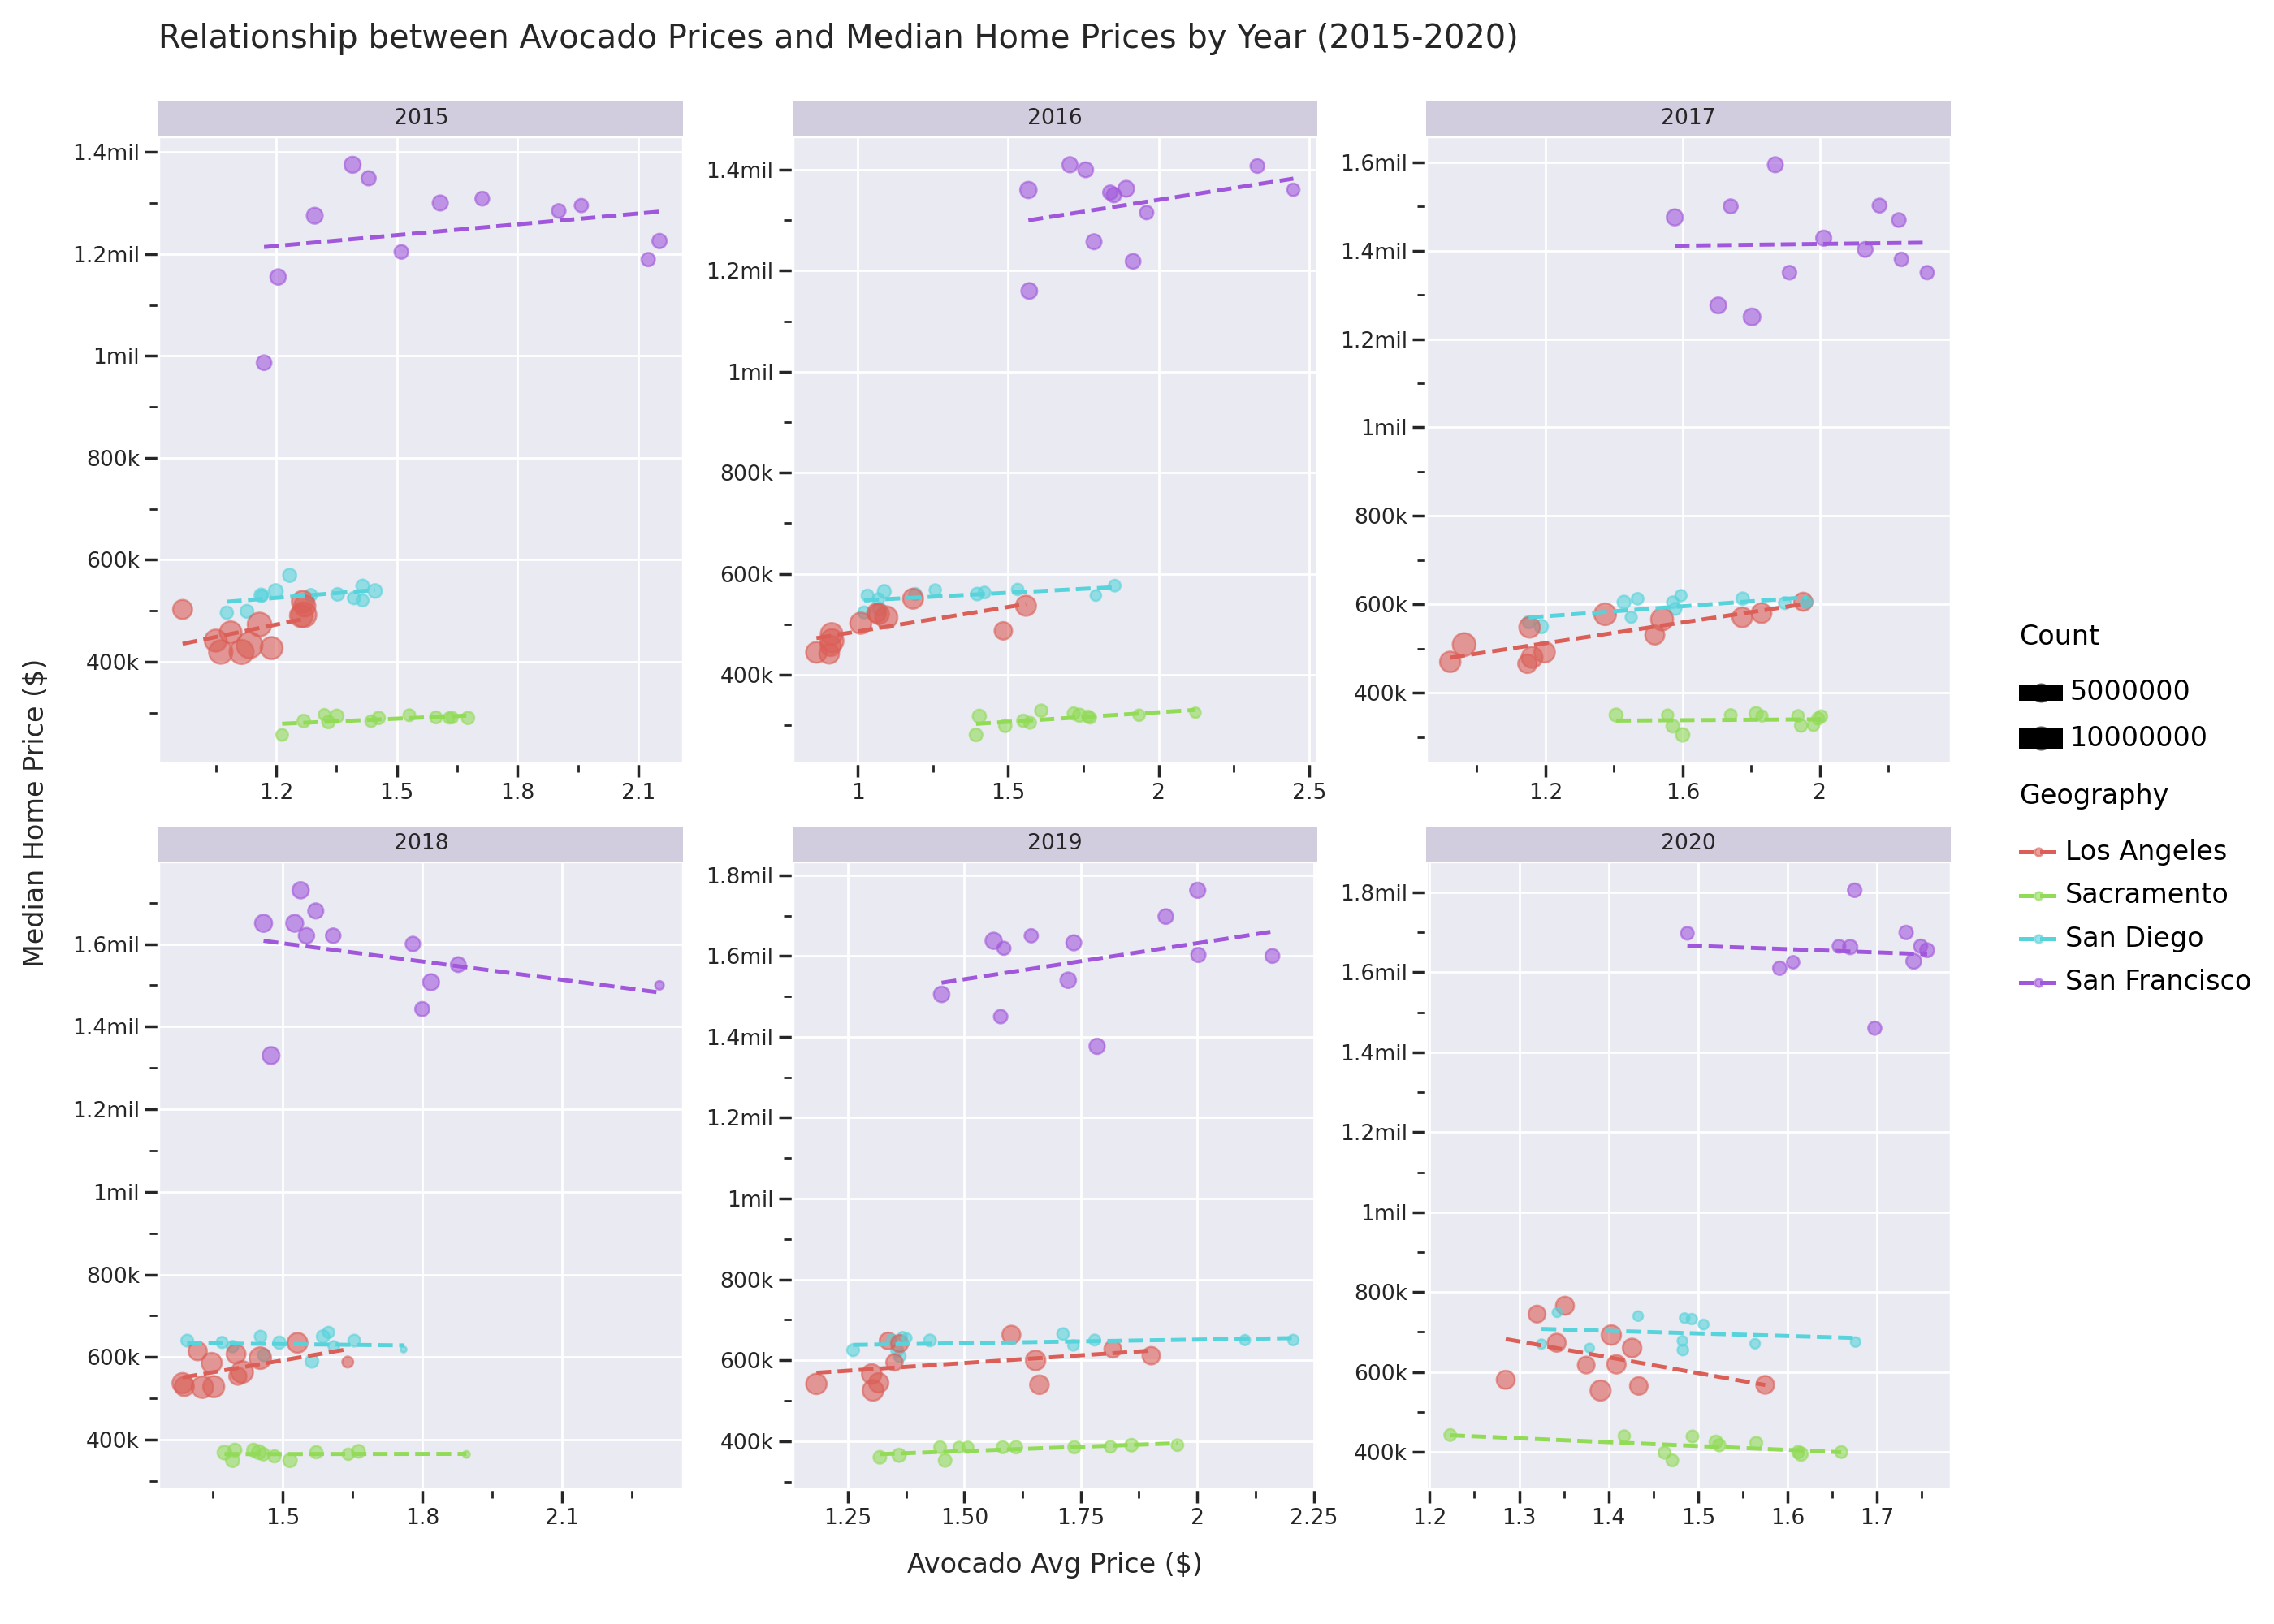

In [186]:
from plotnine import ggplot, aes, geom_point, labs, facet_wrap, theme_seaborn, scale_size, scale_y_continuous, geom_smooth

# Ensuring 'date' is in datetime format
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Extracting year to use in faceting
combined_df['year'] = combined_df['date'].dt.year

# Plotting
plot = (
    ggplot(combined_df, aes(x='average_price', y='MedianPrice', color='geography', size='count'))
    + geom_point(alpha=0.6)
    + geom_smooth(aes(color='geography'), method='lm', se=False, linetype='dashed')
    + labs(
        title="Relationship between Avocado Prices and Median Home Prices by Year (2015-2020)",
        x="Avocado Avg Price ($)",
        y="Median Home Price ($)",
        color="Geography",
        size="Count"
      )
    + facet_wrap('~year', scales='free')
    + theme_seaborn()
    + theme(figure_size=(14, 10))
    + scale_size(range=[1, 6])
    + scale_y_continuous(
        breaks=[200000, 400000, 600000, 800000, 1000000, 1200000, 1400000,1600000, 1800000],
        labels=['200k', '400k', '600k', '800k', '1mil', '1.2mil', '1.4mil', '1.6mil', '1.8mil']
      )
)

plot.draw()

*Interpretation*

At first glance, we can see that San Francisco median home prices are considerably higher than that of Los Angeles, Sacramento, and San Diego. Also, we can see that the most avocados were sold in Los Angeles, while Sacramento and San Diego sold the least of the 4 geographies. In 2015 and 2016, all 4 areas had positive correlations between average avocado price and median home price, which continued into 2017, with only San Francisco having a neutral correlation. As avocado prices rose, so did median home prices. In 2018 however, we see that San Francisco had a negative correlation and we also see this in 2020, with Los Angeles having a negative correlation. There is nothing conclusive that indicates that higher avocado prices necessarily correlate to higher median house prices. Something other than avocado prices are influencing median home prices.
Another thing to note from these plots, is that avocado prices tended to be higher in San Francisco than the other areas. Having said that, even when prices were low in SF, house prices were still high, which indicates that other factors are influencing the housing market. Los Angeles displayed a wide range of avocado prices and the highest volume of sales, but also displayed the lowest prices of the 4 areas. Again, avocado prices did not seem to influence the price of homes in LA. San Diego and Sacramento's median house prices stayed relatively steady during these 5 years, despite the price of avocados fluctuating. 2019 saw an increase in San Diego's avocado prices, but their volume was also one of the lowest.
The prices of avocados being higher did not necessarily determine the upward movement of median home prices, although positive correlation can be found in SF and LA, it was not always the case even while avocado prices fluctuated.Other economic, social, and environmental factors could be influencing these trends. Further statistical analysis should be conducted before we can make any causal relationships. Therefore we can conclude, that millenials spending their money on avocado toast probably did not have an impact on their ability to purchase homes.